# Timeseries of the ERA-5 surface fluxes and the CMEMS surface properties averaged over the DCA

In [1]:
import numpy as np
import pandas as pd
import datetime
import scipy.ndimage as ndim
from scipy.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import seaborn as sns
sns.set_style('darkgrid')
from info import datadir, figdir, getMonths

In [2]:
monthly = pd.read_csv(datadir+'monthly_timeseries.csv',index_col=0)
annual = pd.read_csv(datadir+'annual_timeseries.csv',index_col=0)
dates = pd.to_datetime(monthly['dates'])
years_start = pd.to_datetime(annual['years_start'])
years_half = pd.to_datetime(annual['years_half'])

## Full timeseries

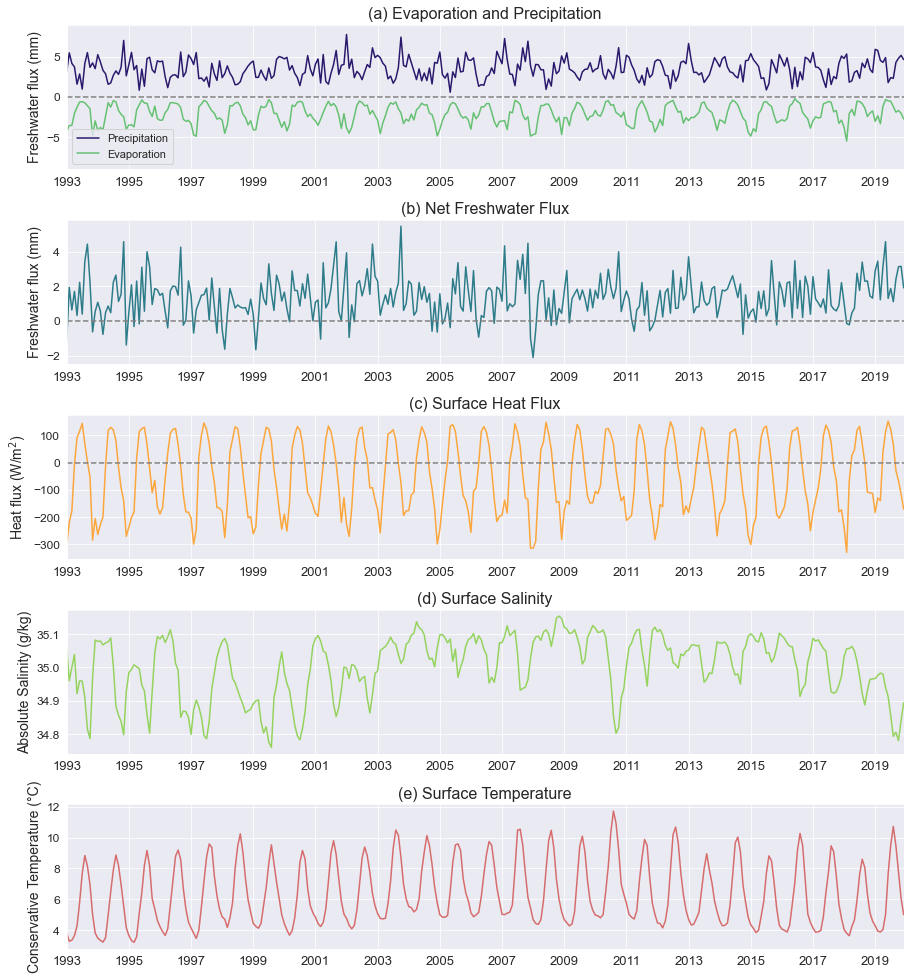

In [3]:
def plotTimeseries(ax,data,color,label,legend=None):
    time = range(len(dates))
    ax.plot(time,data,color=color,label=legend)
    ax.tick_params(axis='both',labelsize=12)
    ax.set_xlim(time[0],time[-1])
    ax.set_xticks(time[0::24])
    ax.set_xticklabels([dates[y].year for y in np.arange(0,len(time[0::24])*24,24)],fontsize=13)
    ax.set_ylabel(label,fontsize=14)

    
cmap_S = matplotlib.cm.get_cmap('cmo.haline')
cmap_T = matplotlib.cm.get_cmap('cmo.thermal')

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(15,17))

plotTimeseries(ax1,monthly['P']*1e3,cmap_S(0),'Freshwater flux (mm)',legend='Precipitation')
plotTimeseries(ax1,monthly['E']*1e3,cmap_S(0.7),'Freshwater flux (mm)',legend='Evaporation')
ax1.set_ylim(-9,9)
ax1.legend(fontsize=11,loc='lower left')
ax1.plot(range(len(dates)),np.zeros(len(dates)),'gray',linestyle='dashed')
ax1.set_title('(a) Evaporation and Precipitation',fontsize=16)

plotTimeseries(ax2,monthly['E_P']*1e3,cmap_S(0.4),'Freshwater flux (mm)')
ax2.plot(range(len(dates)),np.zeros(len(dates)),'gray',linestyle='dashed')
ax2.set_title('(b) Net Freshwater Flux',fontsize=16)

plotTimeseries(ax3,monthly['Q']/(24*60*60),cmap_T(0.8),'Heat flux (W/m$^2$)')
ax3.plot(range(len(dates)),np.zeros(len(dates)),'gray',linestyle='dashed')
ax3.set_title('(c) Surface Heat Flux',fontsize=16)

plotTimeseries(ax4,monthly['surfS'],cmap_S(0.8),'Absolute Salinity (g/kg)')
ax4.set_title('(d) Surface Salinity',fontsize=16)

plotTimeseries(ax5,monthly['surfT'],cmap_T(0.6),'Conservative Temperature ('+'\u00B0'+'C)')
ax5.set_title('(e) Surface Temperature',fontsize=16)

plt.subplots_adjust(hspace=0.35)
plt.savefig(figdir+'surface_forcing_timeseries.pdf',bbox_inches='tight')
plt.show()